<a href="https://colab.research.google.com/github/dramolprakash/Cardiovascular-disease-prediction-ML-project-by-Dr.-Amol-Prakash/blob/main/Cardiovascular_disease_prediction_ML_project_by_Dr_Amol_Prakash_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### loading the csv file in to dataframe using pandas

In [ ]:
path = "/content/drive/MyDrive/heart_data.csv (1)/heart_data.csv"
df= pd.read_csv(path)
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


path = "/content/drive/MyDrive/heart_data.csv (1)/heart_data.csv"
df= pd.read_csv(path)
df.head()

## Data Information, Data Extraction and Data Cleaning.

Getting a summary of the DataFrame, including information about the data types, non-null values, and memory usage using the method "df.info()".

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


display the data types of each column in your DataFrame using df.dtype attribute

In [ ]:
df.dtypes

index            int64
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

The df.size attribute in pandas returns the number of elements in the DataFrame. It represents the total number of entries in the DataFrame, including both rows and columns.

In [ ]:
df.size

980000

The df.shape attribute in pandas returns a tuple representing the dimensions of the DataFrame. The tuple contains two values: the number of rows and the number of columns.

In [ ]:
df.shape

(70000, 14)

The df.columns attribute in pandas returns an Index object containing the column labels of the DataFrame

In [ ]:
df.columns

Index(['index', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

df.duplicated() returns a boolean Series where each row is marked as True if it is a duplicate (i.e., identical to a previous row)
The .sum() function then counts the number of True values.
so,  df.duplicated().sum() expression in pandas is used to count the number of duplicate rows in a DataFrame.

In [ ]:
df.duplicated().sum()

0

## DATA CLEANING and DATA PROCESSING

### DATA EXTRACTION

Selecting Pertinent Attributes or Variables /
Dropping unnecessary columns

### Drop Index Column and Id column

In [ ]:
df.drop(['index', 'id'], axis=1, inplace=True)
print(df)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  19240       2     168    76.0    120     80            1     1      1   
69996  22601       1     158   126.0    140     90            2     2      0   
69997  19066       2     183   105.0    180     90            3     1      0   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  cardio  
0        

In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Check for Null Value.

 The df.isnull().sum() expression in pandas is used to count the number of missing values (NaN) in each column of the DataFrame-- we have no null values.

In [ ]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### Changing age from days to years.


In [ ]:
df['age'] = df['age'].apply(lambda x: int(x/365))
df['age']

0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int64

### Check the Datatypes


In [ ]:
print(df.dtypes)

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


## Checking for Abnormal Values

In our research methodology, we adopt a data cleaning strategy where columns containing null values or exhibiting abnormal values, defined as extreme outliers, constituting less than 5% of the dataset are dropped. This approach is employed to ensure the integrity of our analysis by removing instances of missing data or extreme values that may have minimal impact on the overall dataset. The decision to drop columns with such values below the specified threshold is aimed at mitigating potential bias while preserving the majority of the dataset for a robust analysis.



1. ap_hi: Systolic blood pressure reading. - shows abnormal values such as -(negative)150,and (postive)16200

2. ap_lo: Diastolic blood pressure reading - shows abnormal values such as -(negative)70 to (postive)11000

* These values are not humanly possible , so these values will be dropped.

*   systolic bp can be in range of 80 to 200

*  diastolic bp can be in range of 60 to 160




# Identifying out of range values in "ap_hi" and "ap_lo"
 calulating the total number of rows and percentage of abnormal rows

In [ ]:
systolic_range = (80, 200)  # Define the acceptable range for systolic blood pressure
diastolic_range = (60, 160)  # Define the acceptable range for diastolic blood pressure

# Identify rows with values outside the range for ap_hi and ap_lo
abnormal_rows = df.loc[~df['ap_hi'].between(*systolic_range) | ~df['ap_lo'].between(*diastolic_range), ['ap_hi', 'ap_lo']]

# Print the selected columns for the identified rows
print("Rows with abnormal systolic or diastolic blood pressure:")
print(abnormal_rows)

Rows with abnormal systolic or diastolic blood pressure:
       ap_hi  ap_lo
228      160   1100
241      160   1000
260      140    800
329      160   1000
345      140   1000
...      ...    ...
69771    160   1000
69872    160   1000
69878    160   1000
69885    170   1000
69967    140   1000

[1416 rows x 2 columns]


In [ ]:
# Calculate the percentage of abnormal rows
total_rows = df.shape[0]
percentage_abnormal = (abnormal_rows.shape[0] / total_rows) * 100

# Print the percentage of abnormal rows
print(f"\nPercentage of abnormal rows: {percentage_abnormal:.2f}%")


Percentage of abnormal rows: 2.02%


### Since the percentage of abnormal rows are less thatn 5% ,we can drop them!


In [ ]:
# Drop abnormal rows from the original DataFrame
df_cleaned = df.drop(abnormal_rows.index)

# Display the final cleaned DataFrame
print(df_cleaned.head())

   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   51       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
4   47       1     156    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0  


## Check for outliers

 we can use the Box plot method to identify outliers in a subset of columns in a Pandas DataFrame. The Box plot is a useful visualization tool for detecting outliers and understanding the distribution of continuous data.

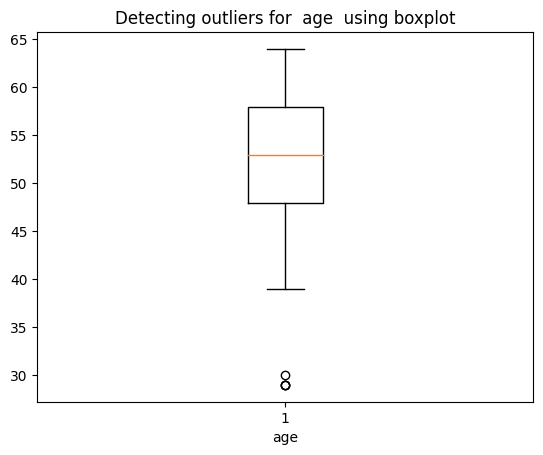

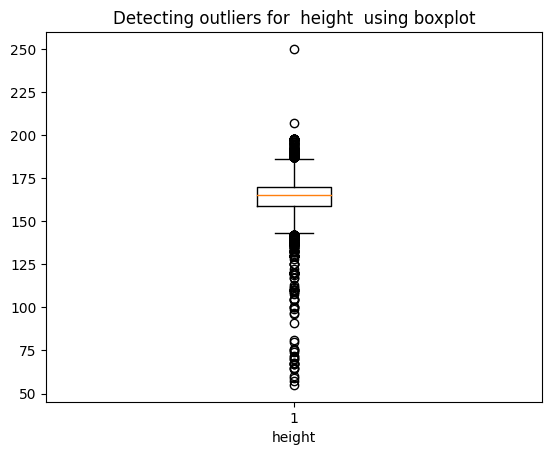

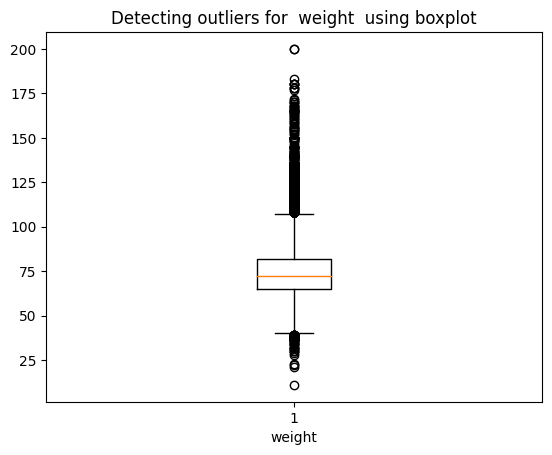

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
columns_to_check = ['age', 'height', 'weight']

for column in columns_to_check:
  plt.boxplot(df_cleaned[column],vert=True)
  plt.title('Detecting outliers for  '+  column + '  using boxplot')
  plt.xlabel(column)
  plt.show()

## Treating outliers by IQR Method

We utilized a method that involved calculating quartiles, determining the interquartile range (IQR), and establishing lower and upper bounds. By applying this approach to specific columns, we identified the exact number of outliers and calculated the percentage of outliers in each column.

In [ ]:
# Specify the columns for which you want to find lower and upper bounds
columns_to_check = ['age', 'height', 'weight']

total_outliers = 0  # To store the total number of outliers across all columns

# Iterate through each specified column
for column in columns_to_check:
    # Calculate quartiles and IQR for each specified column using df_cleaned
    Q1 = df_cleaned[column].quantile(0.25)  # Lower quartile (25%)
    Q3 = df_cleaned[column].quantile(0.75)  # Upper quartile (75%)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for each column using df_cleaned
    outliers = ((df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound))

    # Print the results
    print(f"Column: {column}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")

    # Print the number and percentage of outliers for the current column
    num_outliers = outliers.sum()
    percentage_outliers = (num_outliers / len(df_cleaned)) * 100
    print(f"Number of outliers in '{column}': {num_outliers}")
    print(f"Percentage of outliers in '{column}': {percentage_outliers:.2f}%")
    print("-----")

    # Update the total number of outliers
    total_outliers += num_outliers

# Print the total percentage of outliers across all columns
total_percentage_outliers = (total_outliers / (len(columns_to_check) * len(df_cleaned))) * 100
print(f"Total Percentage of Outliers: {total_percentage_outliers:.2f}%")


Column: age
Lower Bound: 33.0
Upper Bound: 73.0
Number of outliers in 'age': 4
Percentage of outliers in 'age': 0.01%
-----
Column: height
Lower Bound: 142.5
Upper Bound: 186.5
Number of outliers in 'height': 506
Percentage of outliers in 'height': 0.74%
-----
Column: weight
Lower Bound: 39.5
Upper Bound: 107.5
Number of outliers in 'weight': 1739
Percentage of outliers in 'weight': 2.54%
-----
Total Percentage of Outliers: 1.09%


### This code iterates through specified columns, identifies outliers using quartiles and interquartile range, replaces outliers with the lower or upper bounds, verifies the absence of outliers after replacement, and displays the head and information of the final cleaned DataFrame.

In [ ]:
# Iterate through each specified column
for column in columns_to_check:
    # Calculate quartiles and IQR for each specified column using df_cleaned
    Q1 = df_cleaned[column].quantile(0.25)  # Lower quartile (25%)
    Q3 = df_cleaned[column].quantile(0.75)  # Upper quartile (75%)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for each column using df_cleaned
    outliers = ((df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound))

    # Impute outliers with lower and upper bounds
    df_cleaned.loc[df_cleaned[column] < lower_bound, column] = lower_bound
    df_cleaned.loc[df_cleaned[column] > upper_bound, column] = upper_bound

    # Print the number and percentage of outliers replaced for the current column
    num_outliers_replaced = outliers.sum()
    percentage_outliers_replaced = (num_outliers_replaced / len(df_cleaned)) * 100
    print(f"Number of outliers replaced in '{column}': {num_outliers_replaced}")
    print(f"Percentage of outliers replaced in '{column}': {percentage_outliers_replaced:.2f}%")
    print("-----")

# Calculate bounds after replacement
Q1_after = df_cleaned[columns_to_check].quantile(0.25)
Q3_after = df_cleaned[columns_to_check].quantile(0.75)
IQR_after = Q3_after - Q1_after
lower_bound_after = Q1_after - 1.5 * IQR_after
upper_bound_after = Q3_after + 1.5 * IQR_after

# Verify that there are no more outliers after replacement
outliers_after_replace = ((df_cleaned[columns_to_check] < lower_bound_after) | (df_cleaned[columns_to_check] > upper_bound_after)).any(axis=1)

# Print the number of rows with outliers after replacement
num_rows_with_outliers_after_replace = outliers_after_replace.sum()
percentage_rows_with_outliers_after_replace = (num_rows_with_outliers_after_replace / len(df_cleaned)) * 100
print("Number of rows with outliers after replacement:", num_rows_with_outliers_after_replace)
print(f"Percentage of rows with outliers after replacement: {percentage_rows_with_outliers_after_replace:.2f}%")

# Display the final cleaned DataFrame
print(df_cleaned.head())

Number of outliers replaced in 'age': 4
Percentage of outliers replaced in 'age': 0.01%
-----
Number of outliers replaced in 'height': 506
Percentage of outliers replaced in 'height': 0.74%
-----
Number of outliers replaced in 'weight': 1739
Percentage of outliers replaced in 'weight': 2.54%
-----
Number of rows with outliers after replacement: 0
Percentage of rows with outliers after replacement: 0.00%
   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2   168.0    62.0    110     80            1     1      0     0   
1   55       1   156.0    85.0    140     90            3     1      0     0   
2   51       1   165.0    64.0    130     70            3     1      0     0   
3   48       2   169.0    82.0    150    100            1     1      0     0   
4   47       1   156.0    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0   

## After replacing outliers, we save the changes to the 'df_cleaned' DataFrame and then print it
This code saves the DataFrame (df_cleaned) to a CSV file named 'cleaned_data.csv', then verifies the absence of outliers by checking for values beyond the lower and upper bounds in the specified columns (columns_to_check), prints the number of rows with outliers after replacement, and finally displays the head and information of the final cleaned DataFrame.

In [ ]:
# Save the changes to df_cleaned
df_cleaned.to_csv('cleaned_data.csv', index=False)

# Verify that there are no more outliers
outliers_after_replace = ((df_cleaned[columns_to_check] < lower_bound) | (df_cleaned[columns_to_check] > upper_bound)).any(axis=1)

# Print the number of rows with outliers after replacement
print("Number of rows with outliers after replacement:", outliers_after_replace.sum())

# Display the final cleaned DataFrame
print(df_cleaned.head())
print(df_cleaned.info())

Number of rows with outliers after replacement: 68584
   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2   168.0    62.0    110     80            1     1      0     0   
1   55       1   156.0    85.0    140     90            3     1      0     0   
2   51       1   165.0    64.0    130     70            3     1      0     0   
3   48       2   169.0    82.0    150    100            1     1      0     0   
4   47       1   156.0    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68584 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68584 non-null  int64  
 1   gender       68584 non-null  int64  
 2   height       68584 non-null  float64
 3   weight       68584 no

## Data Pre-processing / Feature Engineering- Feature engineering involves creating new features from existing ones to provide the machine learning model with more relevant and informative input.
1. creating a new column - **BMI**, from existing columns like height (in centimeters)and weight (in kilograms) is a form of feature engineering.BMI= weight/height^2

2. Creating a new column - **Pulse Pressure** = systolic bp - diastolic bp ,It represents the force that the heart generates each time it contracts. Healthy pulse pressure is around 40 mmHg.A pulse pressure that is consistently 60 mmHg or greater is likely to be associated with disease, and a pulse pressure of 50 mmHg or more increases the risk of cardiovascular disease.

3. Creating a new column - **Hypertension** , according to AMA,hypertension is defined as a blood pressure at or above 140/90 mmHg. hypertension column is created as a boolean column, where True indicates that the person has hypertension based on the specified threshold values.

##BMI
According to CDC,
If your BMI is less than 18.5, it falls within the underweight range.
If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range.
If your BMI is 25.0 to 29.9, it falls within the overweight range.
If your BMI is 30.0 or higher, it falls within the obese range.

BMI= weight/height^2
weight is the person's weight in kilograms,
height is the person's height in meters.
In the code example provided, since the 'height' column is in centimeters, so I divided it by 100 to convert it to meters before squaring it in the denominator. Here's the relevant code


In [ ]:
# DataFrame has columns 'height' (in centimeters) and 'weight' (in kilograms)
df_cleaned['bmi'] = df_cleaned['weight'] / ((df_cleaned['height'] / 100) ** 2)

# Optionally, round BMI to two decimal places
df_cleaned['bmi'] = df_cleaned['bmi'].round(2)

# Display the DataFrame with the new 'bmi' column
print(df_cleaned.head())


   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2   168.0    62.0    110     80            1     1      0     0   
1   55       1   156.0    85.0    140     90            3     1      0     0   
2   51       1   165.0    64.0    130     70            3     1      0     0   
3   48       2   169.0    82.0    150    100            1     1      0     0   
4   47       1   156.0    56.0    100     60            1     1      0     0   

   active  cardio    bmi  
0       1       0  21.97  
1       1       1  34.93  
2       0       1  23.51  
3       1       1  28.71  
4       0       0  23.01  


## Hypertension Column
 the 'hypertension' column is created as a boolean column, where True indicates that the person has hypertension based on the specified threshold values.we can adjust the systolic_threshold and diastolic_threshold according to the guidelines we want to follow.|

The astype(int) method is used to convert the boolean values to integers (0 for False and 1 for True) in the 'hypertension' column.

In [ ]:
# columns 'ap_hi' (systolic) and 'ap_lo' (diastolic)
systolic_threshold = 140
diastolic_threshold = 90

# Create a new column 'hypertension' based on threshold values
df_cleaned['hypertension'] = (df_cleaned['ap_hi'] >= systolic_threshold) | (df_cleaned['ap_lo'] >= diastolic_threshold)

# Convert True/False to 1/0
df_cleaned['hypertension'] = df_cleaned['hypertension'].astype(int)

# Display the DataFrame with the new 'hypertension' column
print(df_cleaned.head())


   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2   168.0    62.0    110     80            1     1      0     0   
1   55       1   156.0    85.0    140     90            3     1      0     0   
2   51       1   165.0    64.0    130     70            3     1      0     0   
3   48       2   169.0    82.0    150    100            1     1      0     0   
4   47       1   156.0    56.0    100     60            1     1      0     0   

   active  cardio    bmi  hypertension  
0       1       0  21.97             0  
1       1       1  34.93             1  
2       0       1  23.51             0  
3       1       1  28.71             1  
4       0       0  23.01             0  


### Now we save this new cleaned dataframe as CSV file to google drive


In [ ]:
# Save the cleaned DataFrame as a CSV file
df_cleaned.to_csv("/content/drive/MyDrive/heart_data.csv (1)/df_cleaned.csv", index=False)

### now we are trying to call back the cleaned daframe again to collab, we are doing this to save the dataframe with the modifications we have done,so that we can work on it on seperate sesssions.

In [ ]:
file_path = "/content/drive/MyDrive/heart_data.csv (1)/df_cleaned.csv"
df_modified = pd.read_csv(file_path)
df_modified.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,hypertension
0,50,2,168.0,62.0,110,80,1,1,0,0,1,0,21.97,0
1,55,1,156.0,85.0,140,90,3,1,0,0,1,1,34.93,1
2,51,1,165.0,64.0,130,70,3,1,0,0,0,1,23.51,0
3,48,2,169.0,82.0,150,100,1,1,0,0,1,1,28.71,1
4,47,1,156.0,56.0,100,60,1,1,0,0,0,0,23.01,0


# DATA Analysis

## Descriptive Analysis-
for a statistical overview of the dataframe, we utilize the df.describe() function./ and also we find statistical indicators including the mean, standard deviation, minimum and maximum values, and quartile values for this dataframe

In [ ]:
# Display descriptive statistics
df_modified.describe()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,hypertension
count,68584.000000,68584.000000,68584.000000,68584.000000,68584.000000,68584.000000,68584.000000,68584.000000,68584.000000,68584.000000,68584.000000,68584.000000,68584.000000,68584.000000
mean,52.830296,1.348813,164.411495,73.856743,126.582264,81.383646,1.364487,1.225854,0.087965,0.053555,0.803453,0.494853,27.361944,0.343433
std,6.767490,0.476598,7.813163,13.392690,16.517126,9.453615,0.678925,0.571927,0.283246,0.225139,0.397390,0.499977,4.925268,0.474858
min,33.000000,1.000000,142.500000,39.500000,80.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.470000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.880000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.350000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.120000,1.000000
max,64.000000,2.000000,186.500000,107.500000,200.000000,160.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,52.940000,1.000000


We calculate the median,range and variance.

In [ ]:
median = df_modified.median()
print(median)

age              53.00
gender            1.00
height          165.00
weight           72.00
ap_hi           120.00
ap_lo            80.00
cholesterol       1.00
gluc              1.00
smoke             0.00
alco              0.00
active            1.00
cardio            0.00
bmi              26.35
hypertension      0.00
dtype: float64


In [ ]:
range_max_min = df_modified.max()-df_modified.min()
print(range_max_min)

age              31.00
gender            1.00
height           44.00
weight           68.00
ap_hi           120.00
ap_lo           100.00
cholesterol       2.00
gluc              2.00
smoke             1.00
alco              1.00
active            1.00
cardio            1.00
bmi              40.47
hypertension      1.00
dtype: float64


In [ ]:
variance = df_modified.var()
print(variance)

age              45.798927
gender            0.227146
height           61.045511
weight          179.364138
ap_hi           272.815448
ap_lo            89.370828
cholesterol       0.460939
gluc              0.327100
smoke             0.080228
alco              0.050687
active            0.157919
cardio            0.249977
bmi              24.258269
hypertension      0.225490
dtype: float64


# Statistical Analysis
## Test for Normality and Skewness of Data

import necessary packages for statistical analysis

In [ ]:
from scipy import stats,linalg
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

Since we have a large Dataset the Shapiro-Wilk test may not be the most appropriate choice because it can become overly sensitive, leading to a high likelihood of rejecting the null hypothesis (normal distribution) even when the deviation from normality is small."

so we use
## Kolmogorov-Smirnov Test:
The Kolmogorov-Smirnov test is a non-parametric test that compares the sample distribution to a theoretical distribution (e.g., normal).

In [ ]:
from scipy.stats import kstest

columns_to_check = ['age', 'bmi']

for col in columns_to_check:
    stat, p = kstest(df_modified[col], 'norm')
    print(f"Column '{col}': Statistic={stat:.4f}, p={p:.20f}")

    alpha = 0.05
    if p > alpha:
        print("Sample looks Gaussian (fail to reject H0)\n")
    else:
        print("Sample does not look Gaussian (reject H0)\n")


Column 'age': Statistic=1.0000, p=0.00000000000000000000
Sample does not look Gaussian (reject H0)

Column 'bmi': Statistic=1.0000, p=0.00000000000000000000
Sample does not look Gaussian (reject H0)



The results from the Kolmogorov-Smirnov test indicate that both the 'age' and 'bmi' columns do not follow a normal distribution. The p-values are very close to zero, leading to the rejection of the null hypothesis (H0)
 H0: The sample is drawn from a specified distribution (e.g., normal distribution).
 In simpler terms, rejecting the null hypothesis (H0) in these tests indicates that there is evidence to suggest that the data does not follow a normal distribution

## Anderson-Darling Test:
The Anderson-Darling test is another non-parametric test that is suitable for large sample sizes. It is similar to the Kolmogorov-Smirnov test but places more weight on the tails of the distribution.

In [ ]:
from scipy.stats import anderson
import pandas as pd

columns_to_check = ['age', 'bmi']

for col in columns_to_check:
    result = anderson(df_modified[col])
    print(f"Column '{col}': Statistic={result.statistic:.4f}")

    alpha = 0.05
    if result.statistic < result.critical_values[2]:
        print("Sample looks Gaussian (fail to reject H0)\n")
    else:
        print("Sample does not look Gaussian (reject H0)\n")


Column 'age': Statistic=536.1767
Sample does not look Gaussian (reject H0)

Column 'bmi': Statistic=942.7705
Sample does not look Gaussian (reject H0)



The results from the Anderson-Darling test indicate that both the 'age' and 'bmi' columns do not follow a normal distribution.

For 'age' and 'bmi', since the test statistics are greater than the critical values, you reject the null hypothesis, suggesting that the samples do not come from a normally distributed population.



## Normality PLots

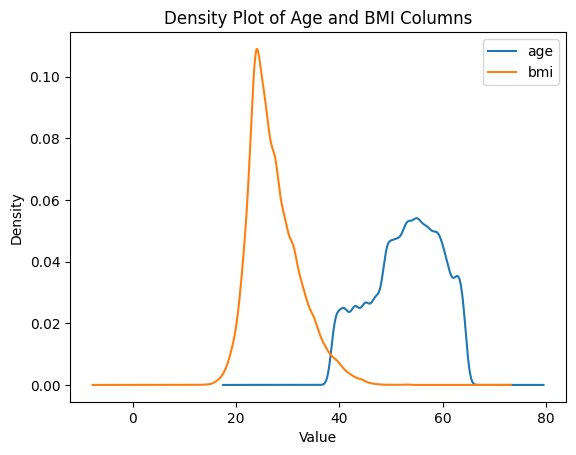

In [ ]:
columns_to_check = ['age', 'bmi']
selected_data = df_modified[columns_to_check]

# Create a density plot with a legend
selected_data.plot(kind='density', label=columns_to_check)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of Age and BMI Columns')
plt.legend()
plt.show()

## Skewness of data:


In [ ]:
import pandas as pd

columns_to_check = ['age', 'bmi']

for col in columns_to_check:
    skewness = df_modified[col].skew()
    print(f"Skewness for '{col}': {skewness}")

    if skewness > 1 or skewness < -1:
        print(f"The distribution of '{col}' is highly skewed.")
    elif skewness > 0.5 or skewness < -0.5:
        print(f"The distribution of '{col}' is moderately skewed.")
    else:
        print(f"The distribution of '{col}' is approximately symmetric.")

    print("\n")


Skewness for 'age': -0.3036941233235372
The distribution of 'age' is approximately symmetric.


Skewness for 'bmi': 0.8618614937759916
The distribution of 'bmi' is moderately skewed.




'age': The skewness is -0.3045, which is close to zero. This indicates that the distribution of 'age' is approximately symmetric.

'bmi': The skewness is 1.0103, which is greater than 1. This indicates that the distribution of 'bmi' is highly skewed, specifically, it has a tail on the right.This positive value indicates that the distribution of 'bmi' is positively skewed.

# Non-Parametric tests:
After conducting a normality test, we found that our data is not normally distributed. As a result, we utilized nonparametric
tests, such as the chi-square and Mann-Whitney U test, moving forward.

## Chi-square test:
The chi-square test is a statistical test used to determine if there is a significant association between categorical variables.
The test is applicable when the variables under consideration are categorical and the observed frequencies are compared to the expected frequencies.

 if the p-value is less than the chosen significance level (commonly 0.05), you reject the null hypothesis, suggesting a significant association or difference. If the p-value is greater than the significance level, you fail to reject the null hypothesis.

### for Chi-Square Test:
Null Hypothesis (H0): There is no significant association between the categorical variables.

Alternative Hypothesis (H1): There is a significant association between the categorical variables.

In [ ]:
df_modified.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,hypertension
0,50,2,168.0,62.0,110,80,1,1,0,0,1,0,21.97,0
1,55,1,156.0,85.0,140,90,3,1,0,0,1,1,34.93,1
2,51,1,165.0,64.0,130,70,3,1,0,0,0,1,23.51,0
3,48,2,169.0,82.0,150,100,1,1,0,0,1,1,28.71,1
4,47,1,156.0,56.0,100,60,1,1,0,0,0,0,23.01,0


Preparing Dataset for Chi-Square test

In [ ]:
df_chisq = df_modified[['gender', 'cholesterol','gluc','smoke','alco','active', 'cardio','hypertension']]
df_chisq.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,hypertension
0,2,1,1,0,0,1,0,0
1,1,3,1,0,0,1,1,1
2,1,3,1,0,0,0,1,0
3,2,1,1,0,0,1,1,1
4,1,1,1,0,0,0,0,0


## Chi-Square Test for Gender and Cardiovascular disease
we perform Chi- Square test between 'gender' and 'cardio'and got a p-value of >0.05, thus, we fail to reject the null
hypothesis (HO) and conclude that there is no significant association between gender and cardiovascular disease occurence.

In [ ]:
from tabulate import tabulate
from scipy.stats import chi2_contingency
import pandas as pd

# Create the contingency table using pd.crosstab
chisq_gender = pd.crosstab(df_chisq['gender'], df_chisq['cardio'], margins=True)

# Extract the values from the contingency table
values = chisq_gender.iloc[0:2, 0:2].values  # Adjusted the indices to select the correct subset

# Conduct chi-square test
chi2, p, dof, expected = chi2_contingency(values)

# Print the contingency table
print("Contingency table:")
table = chisq_gender.reset_index().values.tolist()
headers = ['Gender', 'No Cardiovascular disease', 'Present Cardiovascular disease', 'Total']
print(tabulate(table, headers=headers, tablefmt='grid'))
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("")

# Statistical significance
alpha = 0.05
if p < alpha:
    print("There is a significant association between gender and cardiovascular disease occurrence (reject H0)")
else:
    print("There is no significant association between gender and cardiovascular disease occurrence (fail to reject H0)")


Contingency table:
+----------+-----------------------------+----------------------------------+---------+
| Gender   |   No Cardiovascular disease |   Present Cardiovascular disease |   Total |
+==========+=============================+==================================+=========+
| 1        |                       22673 |                            21988 |   44661 |
+----------+-----------------------------+----------------------------------+---------+
| 2        |                       11972 |                            11951 |   23923 |
+----------+-----------------------------+----------------------------------+---------+
| All      |                       34645 |                            33939 |   68584 |
+----------+-----------------------------+----------------------------------+---------+
Chi-square statistic: 3.22876482843472
p-value: 0.07235524260982153
Degrees of freedom: 1

There is no significant association between gender and cardiovascular disease occurrence (fail to 

## Chi-Square Test for Cholesterol and Cardiovascular disease:
we perform Chi- Square test between 'cholesterol' and 'cardio'and got a p-value of <0.05, thus, we reject the null
hypothesis (HO) and conclude that there is significant association between Cholesterol and cardiovascular disease occurence.

In [ ]:

# Create the contingency table using pd.crosstab
chisq_cholesterol = pd.crosstab(df_chisq['cholesterol'], df_chisq['cardio'], margins=True)

# Extract the values from the contingency table
values = chisq_cholesterol.iloc[0:2, 0:2].values  # Adjusted the indices to select the correct subset

# Conduct chi-square test
chi2, p, dof, expected = chi2_contingency(values)

# Print the contingency table
print("Contingency table:")
table = chisq_cholesterol.reset_index().values.tolist()
headers = ['Cholesterol', 'No Cardiovascular disease', 'Present Cardiovascular disease', 'Total']
print(tabulate(table, headers=headers, tablefmt='grid'))
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("")

# Statistical significance
alpha = 0.05
if p < alpha:
    print("There is a significant association between cholesterol and cardiovascular disease occurrence (reject H0)")
else:
    print("There is no significant association between cholesterol and cardiovascular disease occurrence (fail to reject H0)")


Contingency table:
+---------------+-----------------------------+----------------------------------+---------+
| Cholesterol   |   No Cardiovascular disease |   Present Cardiovascular disease |   Total |
+===============+=============================+==================================+=========+
| 1             |                       29035 |                            22414 |   51449 |
+---------------+-----------------------------+----------------------------------+---------+
| 2             |                        3743 |                             5529 |    9272 |
+---------------+-----------------------------+----------------------------------+---------+
| 3             |                        1867 |                             5996 |    7863 |
+---------------+-----------------------------+----------------------------------+---------+
| All           |                       34645 |                            33939 |   68584 |
+---------------+-----------------------------+----

The p-value in here is given as:
P-value ≈ 2.1684394787623287 x 10^(-179)
This is an extremely small p-value, essentially zero when rounded.
This indicates strong evidence against the null hypothesis.

## Chi-Square Test for Glucose levels and Cardiovascular disease:
we perform Chi- Square test between 'gluc' and 'cardio'and got a p-value of <0.05, thus, we reject the null hypothesis (HO) and conclude that there is significant association between gluc and cardiovascular disease occurence.

In [ ]:
# Create the contingency table using pd.crosstab
chisq_glucose = pd.crosstab(df_chisq['gluc'], df_chisq['cardio'], margins=True)

# Extract the values from the contingency table
values = chisq_glucose.iloc[0:2, 0:2].values  # Adjusted the indices to select the correct subset

# Conduct chi-square test
chi2, p, dof, expected = chi2_contingency(values)

# Print the contingency table
print("Contingency table:")
table = chisq_glucose.reset_index().values.tolist()
headers = ['Glucose level', 'No Cardiovascular disease', 'Present Cardiovascular disease', 'Total']
print(tabulate(table, headers=headers, tablefmt='grid'))
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("")

# Statistical significance
alpha = 0.05
if p < alpha:
    print("There is a significant association between glucose levels and cardiovascular disease occurrence (reject H0)")
else:
    print("There is no significant association between glucose levels and cardiovascular disease occurrence (fail to reject H0)")


Contingency table:
+-----------------+-----------------------------+----------------------------------+---------+
| Glucose level   |   No Cardiovascular disease |   Present Cardiovascular disease |   Total |
+=================+=============================+==================================+=========+
| 1               |                       30576 |                            27739 |   58315 |
+-----------------+-----------------------------+----------------------------------+---------+
| 2               |                        2076 |                             2972 |    5048 |
+-----------------+-----------------------------+----------------------------------+---------+
| 3               |                        1993 |                             3228 |    5221 |
+-----------------+-----------------------------+----------------------------------+---------+
| All             |                       34645 |                            33939 |   68584 |
+-----------------+------------

The p-value in here is given as:
P-value ≈ 1.474928458926905 x 10^-53
This is an extremely small p-value, essentially zero when rounded.
This indicates strong evidence against the null hypothesis.

## Chi-Square Test for 'smoke' for smoking habit and Cardiovascular disease:
we perform Chi- Square test between 'smoke' and 'cardio' and got a p-value of <0.05, thus, we reject the null hypothesis (HO) and conclude that there is significant association between smoking and cardiovascular disease occurence.

In [ ]:
# Create the contingency table using pd.crosstab
chisq_smoking = pd.crosstab(df_chisq['smoke'], df_chisq['cardio'], margins=True)

# Extract the values from the contingency table
values = chisq_smoking.iloc[0:2, 0:2].values  # Adjusted the indices to select the correct subset

# Conduct chi-square test
chi2, p, dof, expected = chi2_contingency(values)

# Print the contingency table
print("Contingency table:")
table = chisq_smoking.reset_index().values.tolist()
headers = ['Smoking', 'No Cardiovascular disease', 'Present Cardiovascular disease', 'Total']
print(tabulate(table, headers=headers, tablefmt='grid'))
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("")

# Statistical significance
alpha = 0.05
if p < alpha:
    print("There is a significant association between smoking habit and cardiovascular disease occurrence (reject H0)")
else:
    print("There is no significant association between smoking habit and cardiovascular disease occurrence (fail to reject H0)")


Contingency table:
+-----------+-----------------------------+----------------------------------+---------+
| Smoking   |   No Cardiovascular disease |   Present Cardiovascular disease |   Total |
+===========+=============================+==================================+=========+
| 0         |                       31441 |                            31110 |   62551 |
+-----------+-----------------------------+----------------------------------+---------+
| 1         |                        3204 |                             2829 |    6033 |
+-----------+-----------------------------+----------------------------------+---------+
| All       |                       34645 |                            33939 |   68584 |
+-----------+-----------------------------+----------------------------------+---------+
Chi-square statistic: 17.681642126935273
p-value: 2.6113471509738496e-05
Degrees of freedom: 1

There is a significant association between smoking habit and cardiovascular disease 

The p-value in here is given as: P-value ≈ 2.6113471509738496 x 10^-5 This is an extremely small p-value, essentially zero when rounded. This indicates strong evidence against the null hypothesis

## Chi-Square Test for 'alco' for alchol habit and Cardiovascular disease:
we perform Chi- Square test between 'alco' and 'cardio' and got a p-value of <0.05, thus, we reject the null hypothesis (HO) and conclude that there is significant association between alchol consumption and cardiovascular disease occurence.

In [ ]:
# Create the contingency table using pd.crosstab
chisq_alchol = pd.crosstab(df_chisq['alco'], df_chisq['cardio'], margins=True)

# Extract the values from the contingency table
values = chisq_alchol.iloc[0:2, 0:2].values  # Adjusted the indices to select the correct subset

# Conduct chi-square test
chi2, p, dof, expected = chi2_contingency(values)

# Print the contingency table
print("Contingency table:")
table = chisq_alchol.reset_index().values.tolist()
headers = ['Alchol', 'No Cardiovascular disease', 'Present Cardiovascular disease', 'Total']
print(tabulate(table, headers=headers, tablefmt='grid'))
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("")

# Statistical significance
alpha = 0.05
if p < alpha:
    print("There is a significant association between Alchol habit and cardiovascular disease occurrence (reject H0)")
else:
    print("There is no significant association between Alchol habit and cardiovascular disease occurrence (fail to reject H0)")


Contingency table:
+----------+-----------------------------+----------------------------------+---------+
| Alchol   |   No Cardiovascular disease |   Present Cardiovascular disease |   Total |
+==========+=============================+==================================+=========+
| 0        |                       32726 |                            32185 |   64911 |
+----------+-----------------------------+----------------------------------+---------+
| 1        |                        1919 |                             1754 |    3673 |
+----------+-----------------------------+----------------------------------+---------+
| All      |                       34645 |                            33939 |   68584 |
+----------+-----------------------------+----------------------------------+---------+
Chi-square statistic: 4.58122685842995
p-value: 0.03232406356363453
Degrees of freedom: 1

There is a significant association between Alchol habit and cardiovascular disease occurrence (rej

The p-value in here is given as: P-value ≈ 0.03232406356363453. The p-value is less than the common significance level of 0.05, indicating that there is a significant association between alcohol consumption and cardiovascular disease.

## Chi-Square Test for 'active' for physical activity and Cardiovascular disease:
we perform Chi- Square test between 'active' and 'cardio' and got a p-value of <0.05, thus, we reject the null hypothesis (HO) and conclude that there is significant association between Physical activity and cardiovascular disease occurence.

In [ ]:
# Create the contingency table using pd.crosstab
chisq_active = pd.crosstab(df_chisq['active'], df_chisq['cardio'], margins=True)

# Extract the values from the contingency table
values = chisq_active.iloc[0:2, 0:2].values  # Adjusted the indices to select the correct subset

# Conduct chi-square test
chi2, p, dof, expected = chi2_contingency(values)

# Print the contingency table
print("Contingency table:")
table = chisq_active.reset_index().values.tolist()
headers = ['Phyisical Acitivity', 'No Cardiovascular disease', 'Present Cardiovascular disease', 'Total']
print(tabulate(table, headers=headers, tablefmt='grid'))
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("")

# Statistical significance
alpha = 0.05
if p < alpha:
    print("There is a significant association between Physicial Activity and cardiovascular disease occurrence (reject H0)")
else:
    print("There is no significant association between Physical Activity and cardiovascular disease occurrence (fail to reject H0)")


Contingency table:
+-----------------------+-----------------------------+----------------------------------+---------+
| Phyisical Acitivity   |   No Cardiovascular disease |   Present Cardiovascular disease |   Total |
+=======================+=============================+==================================+=========+
| 0                     |                        6297 |                             7183 |   13480 |
+-----------------------+-----------------------------+----------------------------------+---------+
| 1                     |                       28348 |                            26756 |   55104 |
+-----------------------+-----------------------------+----------------------------------+---------+
| All                   |                       34645 |                            33939 |   68584 |
+-----------------------+-----------------------------+----------------------------------+---------+
Chi-square statistic: 96.7819036768988
p-value: 7.740030580152556e-23
De

The p-value in here is given as: P-value ≈ 7.740030580152556 x10^-23 . This is an extremely small p-value, essentially zero when rounded.This indicating that there is a significant association between alcohol consumption and cardiovascular disease.

## Chi-Square Test for 'hypertension' and Cardiovascular disease:
we perform Chi- Square test between 'hypertension' and 'cardio' and got a p-value of <0.05, thus, we reject the null hypothesis (HO) and conclude that there is significant association between hypertension and cardiovascular disease occurence.

In [ ]:
# Create the contingency table using pd.crosstab
chisq_hypertension = pd.crosstab(df_chisq['hypertension'], df_chisq['cardio'], margins=True)

# Extract the values from the contingency table
values = chisq_hypertension.iloc[0:2, 0:2].values  # Adjusted the indices to select the correct subset

# Conduct chi-square test
chi2, p, dof, expected = chi2_contingency(values)

# Print the contingency table
print("Contingency table:")
table = chisq_hypertension.reset_index().values.tolist()
headers = ['Hypertension', 'No Cardiovascular disease', 'Present Cardiovascular disease', 'Total']
print(tabulate(table, headers=headers, tablefmt='grid'))
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("")

# Statistical significance
alpha = 0.05
if p < alpha:
    print("There is a significant association between hypertension and cardiovascular disease occurrence (reject H0)")
else:
    print("There is no significant association between hypertension and cardiovascular disease occurrence (fail to reject H0)")


Contingency table:
+----------------+-----------------------------+----------------------------------+---------+
| Hypertension   |   No Cardiovascular disease |   Present Cardiovascular disease |   Total |
+================+=============================+==================================+=========+
| 0              |                       29456 |                            15574 |   45030 |
+----------------+-----------------------------+----------------------------------+---------+
| 1              |                        5189 |                            18365 |   23554 |
+----------------+-----------------------------+----------------------------------+---------+
| All            |                       34645 |                            33939 |   68584 |
+----------------+-----------------------------+----------------------------------+---------+
Chi-square statistic: 11642.414778205937
p-value: 0.0
Degrees of freedom: 1

There is a significant association between hypertension an

The p-value is less than the common significance level of 0.05, indicating that there is a significant association between hypertension and cardiovascular disease. Therefore, we reject the null hypothesis.

# Mann-Whitney U Test:
The Mann-Whitney U test, also known as the Wilcoxon rank-sum test, is a non-parametric test used to assess whether there is a difference between two independent and identically distributed samples.

the test involves comparing the ranks of the data in each group and calculating the Mann-Whitney U statistic. This U statistic is then used to assess whether there is a statistically significant difference between the two groups.

If the U statistic is sufficiently small or large (depending on the direction of the test), it leads to the rejection of the null hypothesis, indicating a significant difference between the groups.

Null Hypothesis (HO): There is no difference between the two groups.

Alternative Hypothesis (H1): There is a significant difference between the two groups.

## Data Preparation for Mann-Whitney U test

In [ ]:
df_mannwu = df_modified[['age','bmi','cardio']]
df_mannwu.head()

,age,bmi,cardio
0,50,21.97,0
1,55,34.93,1
2,51,23.51,1
3,48,28.71,1
4,47,23.01,0


## Mann-Whitney U Test between Age and Cardio.
Mann-Whitney U test between age with cardio and got a p-value of <0.05, thus, we reject the null
hypothesis (HO) and conclude that there is significant association between age and cardiovascular disease occurence.

In [ ]:
from scipy.stats import mannwhitneyu
U, p_value = mannwhitneyu(df_mannwu.age, df_mannwu.cardio )
print ("U-statistic : ", U)
print (" p-value:", p_value)
if p_value < 0.05 :
  print ("there is significant association between the age and cardiovascular disease occurance(Reject H0)" )
else :
  print ("there is no significant association behieen the Age and cardiovascular disease occurance(Fail to reject H0)")

U-statistic :  4703765056.0
 p-value: 0.0
there is significant association between the age and cardiovascular disease occurance(Reject H0)


## Mann-Whitney U Test between BMI and Cardio.
Mann-Whitney U test between BMI with cardio and got a p-value of <0.05, thus, we reject the null hypothesis (HO) and conclude that there is significant association between BMI and cardiovascular disease occurence.

In [ ]:
from scipy.stats import mannwhitneyu
U, p_value = mannwhitneyu(df_mannwu.bmi, df_mannwu.cardio )
print ("U-statistic : ", U)
print (" p-value:", p_value)
if p_value < 0.05 :
  print ("there is significant association between the BMI and cardiovascular disease occurance(Reject H0)" )
else :
  print ("there is no significant association behieen the BMI and cardiovascular disease occurance(Fail to reject H0)")

U-statistic :  4703765056.0
 p-value: 0.0
there is significant association between the BMI and cardiovascular disease occurance(Reject H0)


# DATA Visualization
Data visualization is a crucial aspect of data analysis and communication. It involves representing data graphically to gain insights, identify patterns, and convey information effectively.

We will illustrate data using histograms, pie chart, and bar charts.

### Histogram representation of the continous data: 'age', 'bmi'

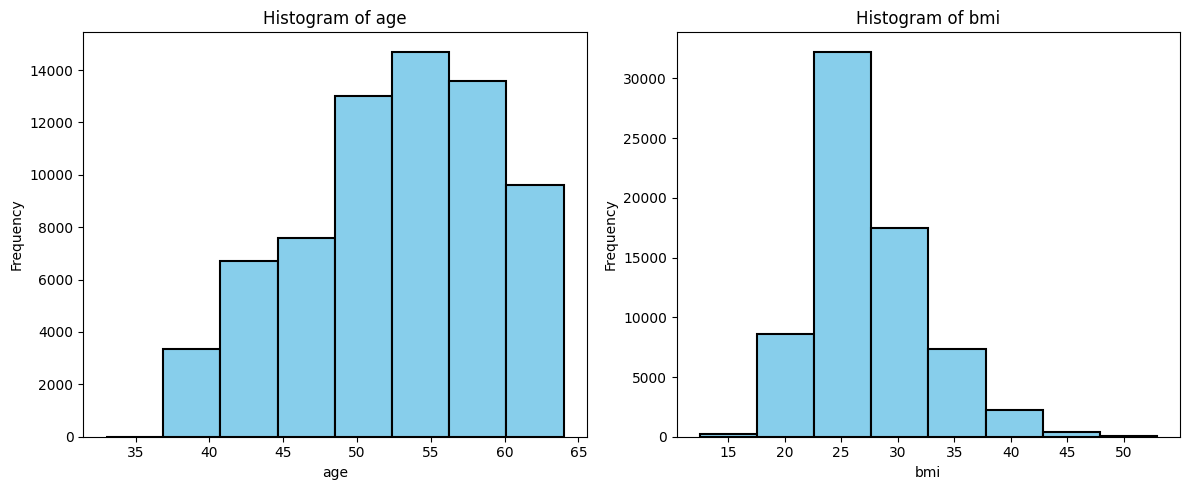

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

df_hist = df_modified[['age', 'bmi']]

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Flatten axes
for ax, col in zip(axes.flatten(), df_hist.columns):
    ax.hist(df_hist[col], bins=8, color='skyblue', edgecolor='black', lw=1.5)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Pie chart representation of gender with cardio:
we will use matplotlib library package, and uese the pie() function to create a pie chart, It shows the distribution of gender of people who are prone to cardiovascular disease occurence. Here in our dataset, male = 1 , female = 2

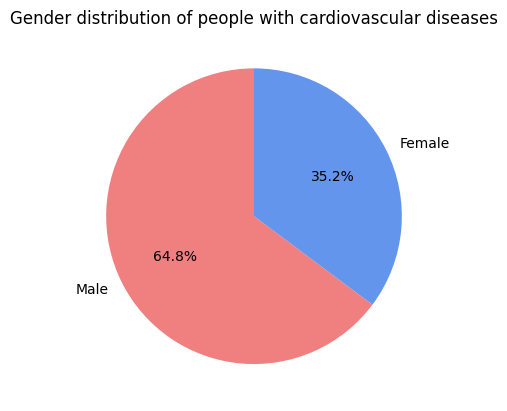

In [ ]:
# Assuming df_modified is your DataFrame
df_pie = df_modified[df_modified['cardio'] == 1]
df_pie = df_pie[df_pie['gender'].isin([1, 2])]

counts = df_pie['gender'].value_counts()
labels = ['Male', 'Female']
colors = ['lightcoral', 'cornflowerblue']

plt.pie(counts, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Gender distribution of people with cardiovascular diseases')
plt.show()


### Bar chart representation of Risk factors which includes

1.  such as hypertension, glucose and cholestrol and lifestyle choices (alchol , smoking)

### with cardio(cardiovascular disease)

we will use matplotlib library package and use the bar() function to create a bar chart with risk factors on X axis, and occurence of cardiovascular disease on y-axis.

The chart suggests that patients with hypertension (HTN), have the highest occurence of cardiovascular disease

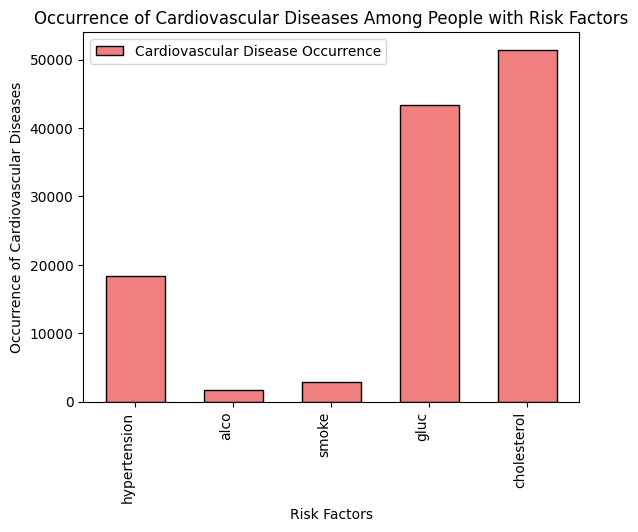

In [ ]:
# Subset data to only include rows with cardiovascular disease occurrence present
cardio_occur = df_modified[df_modified['cardio'] == 1]

# Count the number of cardiovascular disease occurrences in each risk factor column
cardio_count = cardio_occur[['hypertension','alco', 'smoke','gluc','cholesterol']].sum()

# Create the bar chart with a different color and legend
plt.bar(cardio_count.index, cardio_count.values, color='lightcoral',edgecolor ='black', label='Cardiovascular Disease Occurrence', width = 0.6)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation= 90 , ha='right')

# Add axis labels and title
plt.xlabel('Risk Factors')
plt.ylabel('Occurrence of Cardiovascular Diseases')
plt.title('Occurrence of Cardiovascular Diseases Among People with Risk Factors')

# Add legend
plt.legend()

# Show the chart
plt.show()

## Overall Histogram distribution of the data frame:
Histogram of all desired attributes

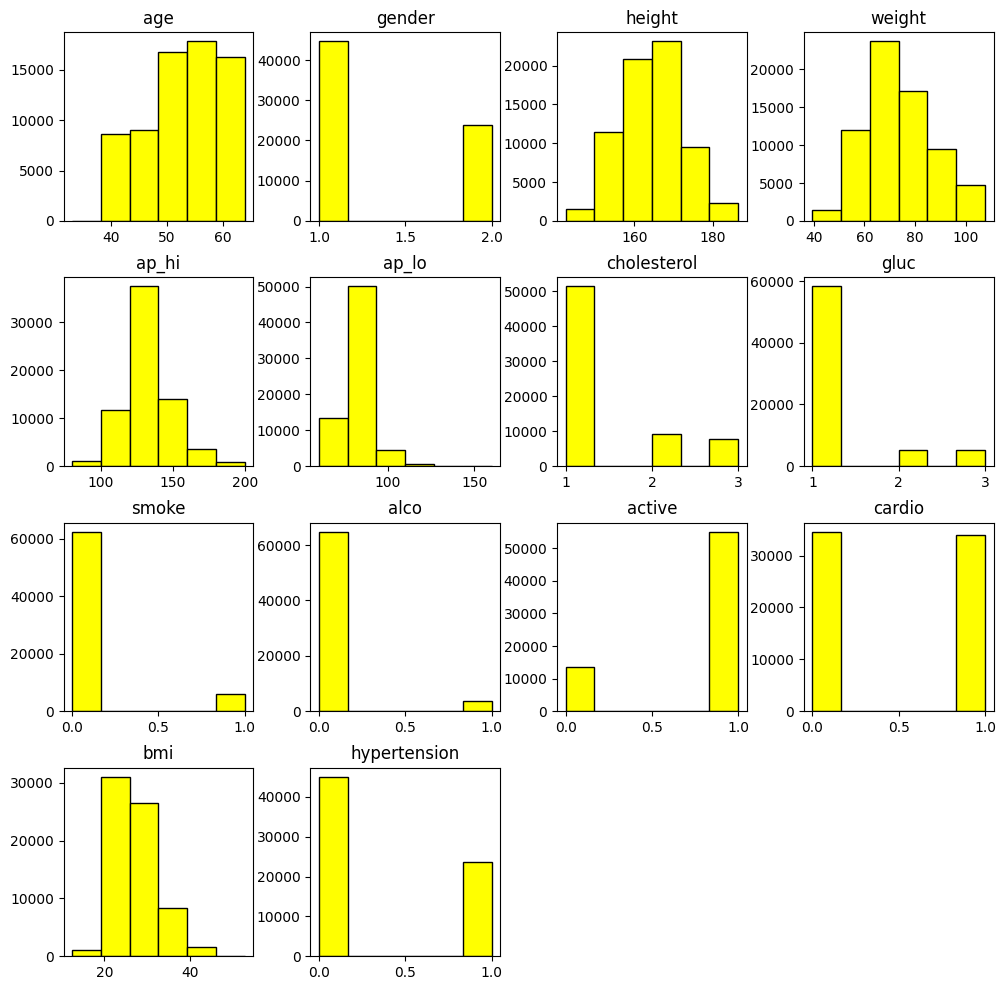

In [ ]:
df_hist = df_modified [ [ 'age', 'gender', 'height' , 'weight' , 'ap_hi' , 'ap_lo' , 'cholesterol' , 'gluc' , 'smoke' , 'alco' , 'active' , 'cardio' , 'bmi' ,
'hypertension',] ]
df_hist.hist(figsize= [ 12, 12 ] , bins =6, grid=False,color= 'yellow' , edgecolor ='black' , lw = 1 )
plt.show()

## Spearman’s Correlation Heat Map:

A Spearman's correlation heatmap visualizes the Spearman's rank correlation coefficients between pairs of variables in a dataset. Spearman's rank correlation is a non-parametric measure of the strength and direction of monotonic relationships between two variables. It assesses whether the variables tend to increase or decrease together, without assuming a linear relationship.

The Spearman's correlation coefficient is calculated based on the ranks of the data rather than the raw data values. It assigns ranks to the observations in each variable and then computes the correlation based on the ranks.

A Spearman's correlation heatmap is a graphical representation of these correlation coefficients. Each cell in the heatmap represents the Spearman's correlation between the corresponding pair of variables. The color intensity and direction in the heatmap indicate the strength and nature of the correlation:


Darker colors (e.g., dark blue or dark red) indicate stronger correlations.
Here Strong Positive correlations are represented by dark red.
and Strong Negative correlations are represented by dark blue.
and a neutral or weak correlation is represted by white or lighter colors.

### According to Spearman's Correlation Heat Map, we conclude that hypertension (0.41) , age(0.24),cholesterol (0.21), and bmi(0.20) has strong postive correlation with 'cardio' i.e occurence of cardiovascular diseases.


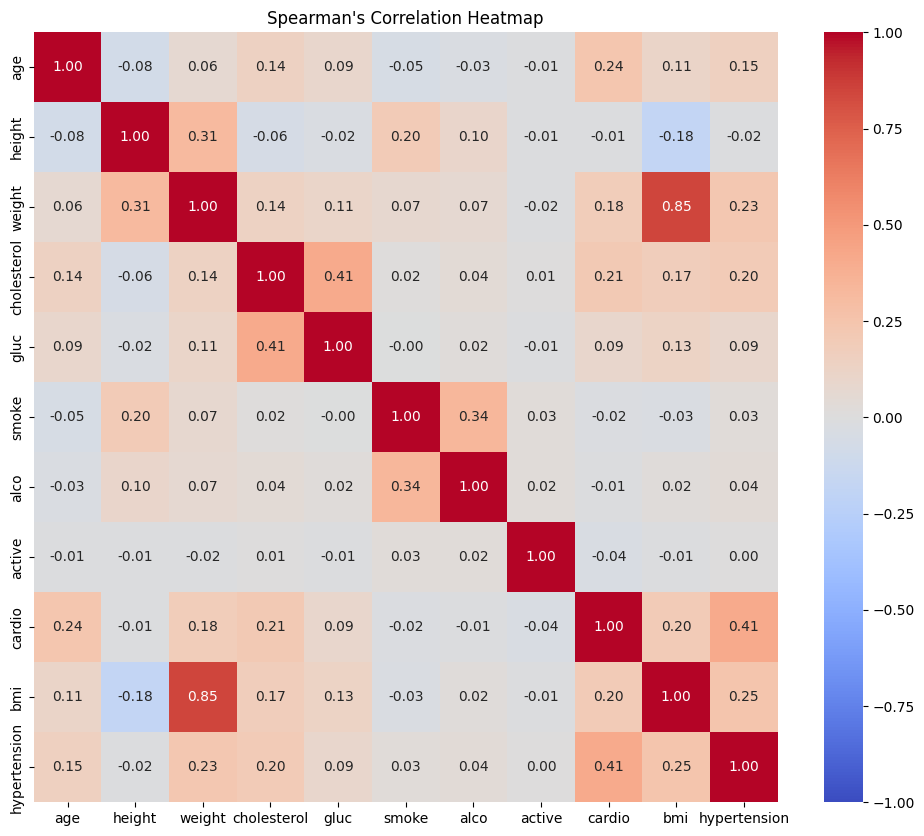

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_modified is your DataFrame
# If not, replace it with your actual DataFrame name

# Select the columns you want to include in the heatmap
selected_columns = ['age', 'height', 'weight','cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio','bmi','hypertension']

# Subset the DataFrame with selected columns
df_subset = df_modified[selected_columns]

# Calculate Spearman's correlation matrix
corr_matrix = df_subset.corr(method='spearman')

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Set the title
plt.title ("Spearman's Correlation Heatmap")

# Show the plot
plt.show()

# Machine Learning Models:

Machine learning models are algorithms that enable machines to learn from data and make predictions. The Scikit-plot Python package, built on Matplotlib, simplifies the creation of visualizations for these models. It facilitates the generation of various graphs, including ROC curves and confusion matrices. ROC curves provide insights into model performance across different thresholds, while confusion matrices offer a detailed breakdown of predictions. Scikit-plot's integration with Scikit-learn enhances its utility, making it a valuable tool for visualizing and interpreting machine learning outcomes in a concise and effective manner.

### WE WILL DO CLASSIFICATION MODELS SUCH AS:

1.   Logistic Regression
2.   Gaussian Naive Bayes
3.   Random Forest Sampling
4.   Decision Tree







In [ ]:
!pip install  scikit-plot

## Checking if our dataset is balanced or not

### In this case, the dataset seems to be relatively balanced, with a nearly equal distribution between classes '0' and '1

In [ ]:
import pandas as pd

# Assuming 'target' is your boolean target variable
class_counts = df_modified['cardio'].value_counts()
class_proportions = df['cardio'].value_counts(normalize=True)

print("Class Counts:")
print(class_counts)

print("\nClass Proportions:")
print(class_proportions)

Class Counts:
0    34645
1    33939
Name: cardio, dtype: int64

Class Proportions:
0    0.5003
1    0.4997
Name: cardio, dtype: float64


Class '0': 34,645 instances
Class '1': 33,939 instances
The 'cardio' column is binary, and these counts represent the number of occurrences of each class in the dataset.

Class Proportions:
Class '0': Approximately 50.03%
Class '1': Approximately 49.97%

The 'cardio' column proportions are normalized, providing the percentage of each class relative to the total number of instances.

## Importing essential libraries for ML

This Python script imports libraries and modules from scikit-learn, XGBoost, and scikitplot for tasks like data preprocessing, model training (including classifiers like Naive Bayes, k-Nearest Neighbors, and XGBoost), and evaluation metrics (confusion matrices, accuracy scores, ROC curves, AUC).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
import scikitplot as skplt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Random Forest Regressor with Feautre Ranking

### We performed a feature importance analysis utilizing the Random Forest Regressor from Scikit-Learn. The dataset was partitioned into features and target variable("cardio"), followed by the training of the regression model. Subsequently, we assessed the importance of each feature in predicting the target variable("cardio").

Following the division of the dataset into features and target variables, a Random Forest Regressor model was constructed using 100 trees and a fixed random state of 42.

The feature ranking provides information about the importance of each feature in predicting the target variable (in this case, "cardio").The higher the importance score, the more influential the feature is in the model.

 Here we can see the Top Features contributing to the prediction of Cardiovascualr diseases are "bmi" has the highest importance, indicating it strongly contributes to the model's predictions, then "hypertension", "age", "cholesterol", "gender" and "gluc" for glucose levels.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Drop columns that we consider unnecessary, repeating
columns_to_drop = ['ap_hi', 'ap_lo', 'height','weight']
df_selected = df_modified.drop(columns=columns_to_drop)

# Separate features and target variable
x = df_selected.drop('cardio', axis=1)
y = df_selected['cardio']

# Create model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
model.fit(x, y)

# Calculate feature importance
importances = model.feature_importances_

# Sort the features by importance
indices = importances.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(x.shape[1]):
    print(f"{f+1}. {x.columns[indices[f]]}: {importances[indices[f]]}")


Feature ranking:
1. bmi: 0.4646786061536137
2. hypertension: 0.18972870720719268
3. age: 0.18078384566396696
4. cholesterol: 0.042666423048600056
5. gender: 0.037695500913987476
6. gluc: 0.02932058315985312
7. active: 0.023666488385456916
8. smoke: 0.018301795652315076
9. alco: 0.013158049815013974


## Bar chart to visually represent the feature importance.

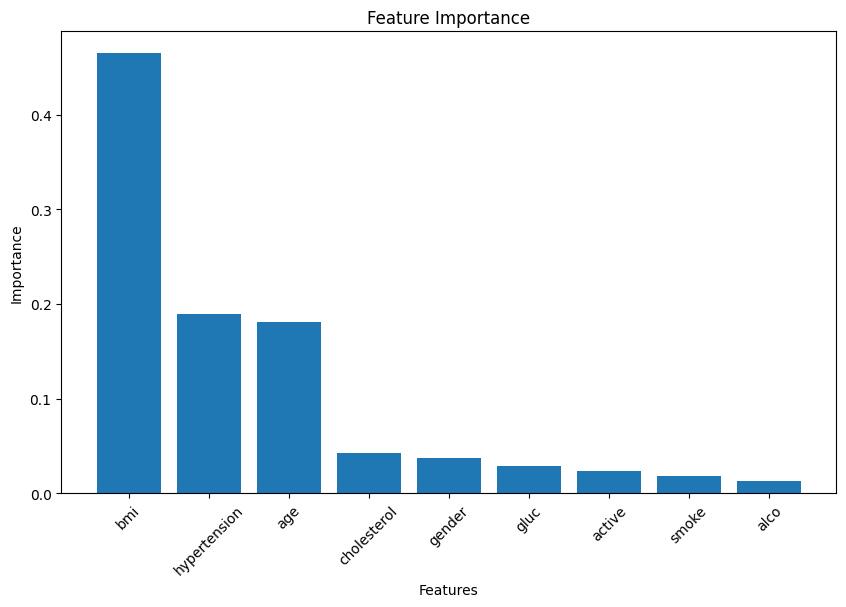

In [ ]:
import matplotlib.pyplot as plt

# Assuming the feature ranking is available in the 'indices' variable

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), x.columns[indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


The plot highlights feature importance, with "bmi" at 0.46 and "alco" at 0.013 This insight guides refining the model for more accurate predictions in cardiovascular disease cases.

 Identifying the most important predictors using feature importance can provide valuable insights into the factors that contribute significantly to cardiovascular diseases in our dataset.

## Python code for MinMaxScaler

The values of first 6 columns("bmi", "hypertension", "age", "cholesterol", "gender", "gluc") in feature importance ranking are normalized to a the range of 0 to 1 using the MinMaxScaler object from the sklearn.preprocessing module.

A freshly generated DataFrame, denoted as `normalized_df`, is established, encompassing the target variable (`cardio`) and housing the normalized values. The transformation of each column in the dataset is executed utilizing the `fit_transform()` method.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

selected_features = ["bmi", "hypertension", "age", "cholesterol", "gender", "gluc", "cardio"]

# Create a new DataFrame with selected features
normalized_df = df_modified[selected_features].copy()

# Instantiate a MinMaxScaler
feature_scaler = MinMaxScaler()

# Apply Min-Max scaling to each selected feature
normalized_df["bmi"] = feature_scaler.fit_transform(normalized_df["bmi"].values.reshape(-1, 1))
normalized_df["hypertension"] = feature_scaler.fit_transform(normalized_df["hypertension"].values.reshape(-1, 1))
normalized_df["age"] = feature_scaler.fit_transform(normalized_df["age"].values.reshape(-1, 1))
normalized_df["cholesterol"] = feature_scaler.fit_transform(normalized_df["cholesterol"].values.reshape(-1, 1))
normalized_df["gender"] = feature_scaler.fit_transform(normalized_df["gender"].values.reshape(-1, 1))
normalized_df["gluc"] = feature_scaler.fit_transform(normalized_df["gluc"].values.reshape(-1, 1))
normalized_df["cardio"] = feature_scaler.fit_transform(normalized_df["cardio"].values.reshape(-1, 1))

# Display the resulting DataFrame
print(normalized_df)



            bmi  hypertension       age  cholesterol  gender  gluc  cardio
0      0.234742           0.0  0.548387          0.0     1.0   0.0     0.0
1      0.554979           1.0  0.709677          1.0     0.0   0.0     1.0
2      0.272795           0.0  0.580645          1.0     0.0   0.0     1.0
3      0.401285           1.0  0.483871          0.0     1.0   0.0     1.0
4      0.260440           0.0  0.451613          0.0     0.0   0.0     0.0
...         ...           ...       ...          ...     ...   ...     ...
68579  0.357302           0.0  0.612903          0.0     1.0   0.0     0.0
68580  0.755869           1.0  0.903226          0.5     0.0   0.5     1.0
68581  0.466518           1.0  0.612903          1.0     1.0   0.0     1.0
68582  0.361502           0.0  0.903226          0.0     0.0   0.5     1.0
68583  0.307388           0.0  0.741935          0.5     0.0   0.0     0.0

[68584 rows x 7 columns]


Based on the ranking of feature importance, we opted for the initial six attributes to construct our machine-learning models. "y" designates the target variable (cardio), and "x" encompasses the chosen features for the model, specifically bmi, hypertension, age, cholesterol, gender, and gluc.

The "train_test_split" function from scikit-learn is employed to partition the data into training and testing sets. "x_train" and "y_train" denote the training data, utilized for model training, while "x_test" and "y_test" represent the testing data, employed to assess the model's performance. The dataset is divided into an 80-20 ratio for training and testing, respectively.

In [ ]:
from sklearn.model_selection import train_test_split

# Define independent variables (features) and dependent variable (target)
X = normalized_df[["bmi", "hypertension", "age", "cholesterol", "gender", "gluc"]]  # Independent variables
y = normalized_df["cardio"]  # Dependent variable

# Use train_test_split to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

# Now, X_train and y_train are the features and target variable for training, respectively,
# and X_test and y_test are the features and target variable for testing, respectively.


### this code trains a Random Forest model,
makes predictions on a test set, and prints various evaluation metrics to assess the model's performance. The evaluation metrics provide insights into how well the model is classifying instances, including accuracy, precision, recall, and F1-score.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=20)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Random Forest Model Evaluation:
Accuracy: 0.6460

Confusion Matrix:
[[4557 2371]
 [2485 4304]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.66      0.65      6928
         1.0       0.64      0.63      0.64      6789

    accuracy                           0.65     13717
   macro avg       0.65      0.65      0.65     13717
weighted avg       0.65      0.65      0.65     13717



The accuracy of the Random Forest model is 0.6460, or 64.60%. This accuracy value indicates the proportion of correctly predicted instances out of the total number of instances in your test set. The confusion matrix and classification report provide additional details on the model's performance, including precision, recall, and F1-score for each class (0.0 and 1.0).


### confusion matrix for Random Forest

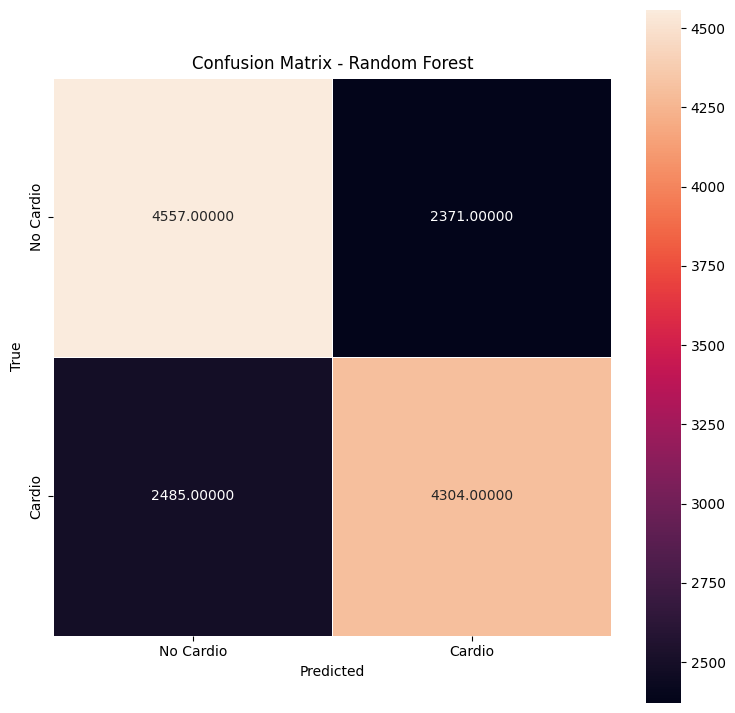

In [ ]:
# Construct a confusion matrix for Random Forest
conf_matrix_ = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, fmt='.5f', linewidths=.7, square=True,
            xticklabels=['No Cardio', 'Cardio'],
            yticklabels=['No Cardio', 'Cardio'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### ROC and AUC score for Random Forest Model
 this code visually represents the performance of the Random Forest model by plotting its ROC curve and calculating the AUC score

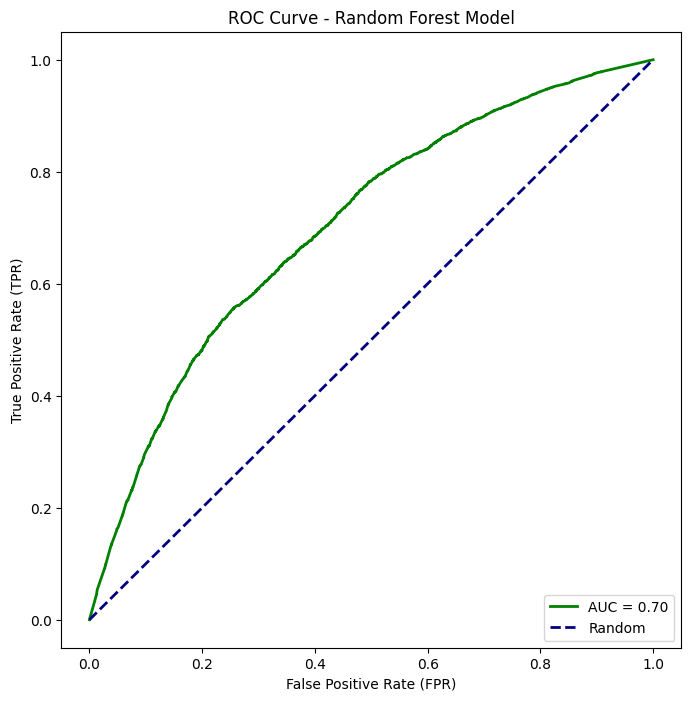

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

# Calculate the AUC score
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest Model')
plt.legend(loc='lower right')
plt.show()


## Logistic Regression:

Logistic regression serves as a statistical model designed to forecast the probability of a binary outcome, allowing for an examination of the connection between a group of independent variables and a dependent variable. This method entails computing the probability of the binary outcome by considering the values of the independent variables.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a logistic regression model
logreg_model = LogisticRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.4f}")

# Train the model on the full training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("\nModel Evaluation on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Cross-Validation Scores:
[0.71979224 0.72043011 0.71675932 0.71830858 0.72651053]
Mean Accuracy: 0.7204

Model Evaluation on Test Set:
Accuracy: 0.7175

Confusion Matrix:
[[5535 1393]
 [2482 4307]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.80      0.74      6928
         1.0       0.76      0.63      0.69      6789

    accuracy                           0.72     13717
   macro avg       0.72      0.72      0.72     13717
weighted avg       0.72      0.72      0.72     13717



- Precision, recall, and F1-score provide insights into the model's performance for each class. In this case, both classes have relatively balanced precision, recall, and F1-score values.

An accuracy of 71.75% suggests that the model is performing reasonably well. However, depending on the specific goals of your analysis, you may want to further investigate, potentially by tuning hyperparameters, exploring different features, or considering other models to improve performance.


### Confusion matrix for Logistic Regression

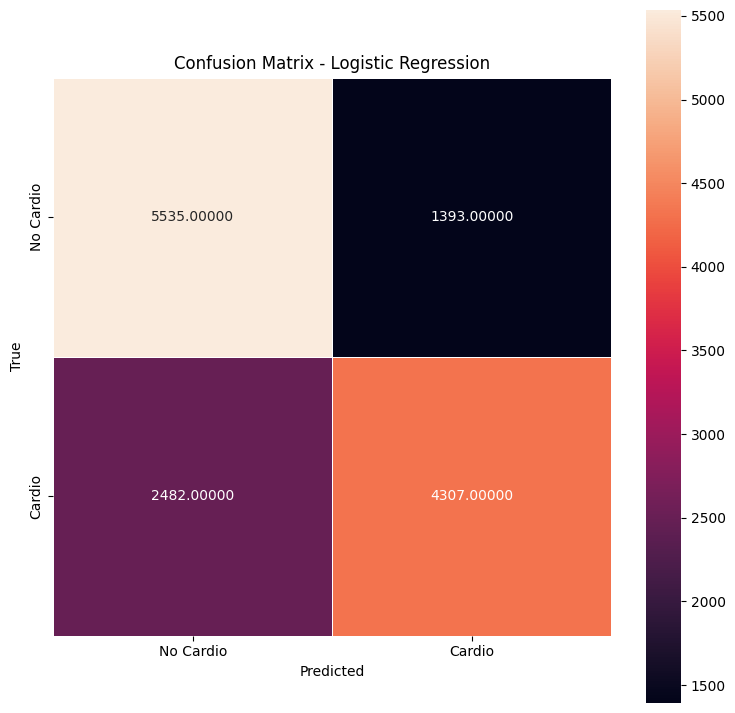

In [ ]:
# Construct a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, fmt='.5f', linewidths=.7, square=True,
            xticklabels=['No Cardio', 'Cardio'],
            yticklabels=['No Cardio', 'Cardio'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


### ROC and AUC score for the Logistic regression model

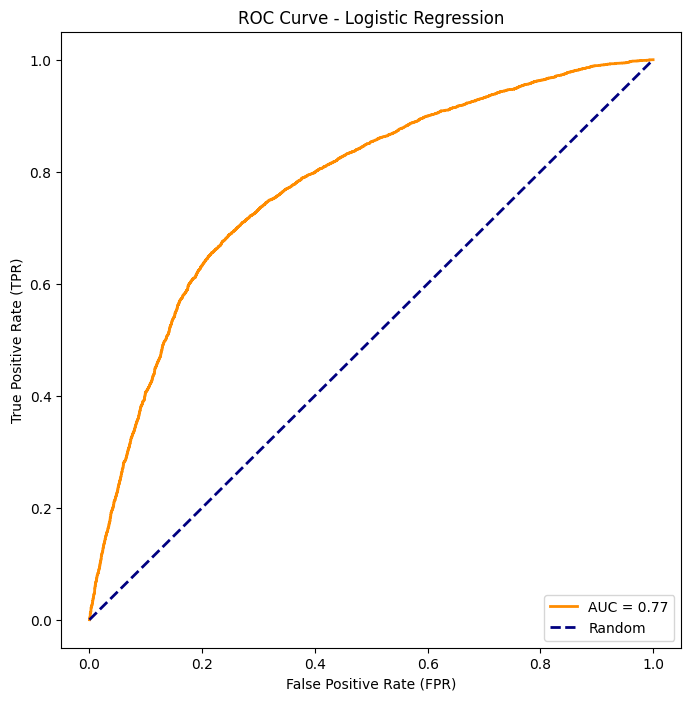

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob = logreg_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


## DECISION TREE

The code utilizes the scikit-learn library to implement a Decision Tree classifier. It starts by splitting the dataset into training and testing sets. The Decision Tree model is then trained on the training data and used to make predictions on the test data. Finally, the script evaluates the model's performance using metrics like accuracy, confusion matrix, and classification report on the test set. In essence, it leverages a Decision Tree algorithm to classify instances based on a set of features and assesses its effectiveness in predicting outcomes.

In [ ]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Fit the model
dtc_scores = cross_val_score(decision_tree, X_train, y_train, cv=5)
print("Decision Tree Classification Model")
print("CV scores: ", dtc_scores)
print("Mean CV accuracy: {:.2f}".format(dtc_scores.mean()))
print(" ")

decision_tree.fit(X_train, y_train)
dtc_pred = decision_tree.predict(X_test)

# Model performance
dtc_accuracy = accuracy_score(y_test, dtc_pred) * 100
print('Accuracy: ', dtc_accuracy)

# Classification report
print(classification_report(y_test, dtc_pred))
print("")


Decision Tree Classification Model
CV scores:  [0.63267724 0.63705121 0.62726693 0.6310945  0.63401075]
Mean CV accuracy: 0.63
 
Accuracy:  62.951082598235764
              precision    recall  f1-score   support

         0.0       0.62      0.68      0.65      6928
         1.0       0.64      0.57      0.61      6789

    accuracy                           0.63     13717
   macro avg       0.63      0.63      0.63     13717
weighted avg       0.63      0.63      0.63     13717




- Precision, recall, and F1-score provide insights into the model's performance for each class. In this case, both classes have similar precision, recall, and F1-score values.

The accuracy of 62.78% suggests that the Decision Tree model is performing reasonably well. However, depending on the specific goals of your analysis, you may want to further investigate, potentially by tuning hyperparameters, exploring different features, or considering other models to improv


### Confusion Matrix for Decision Tree Classifier

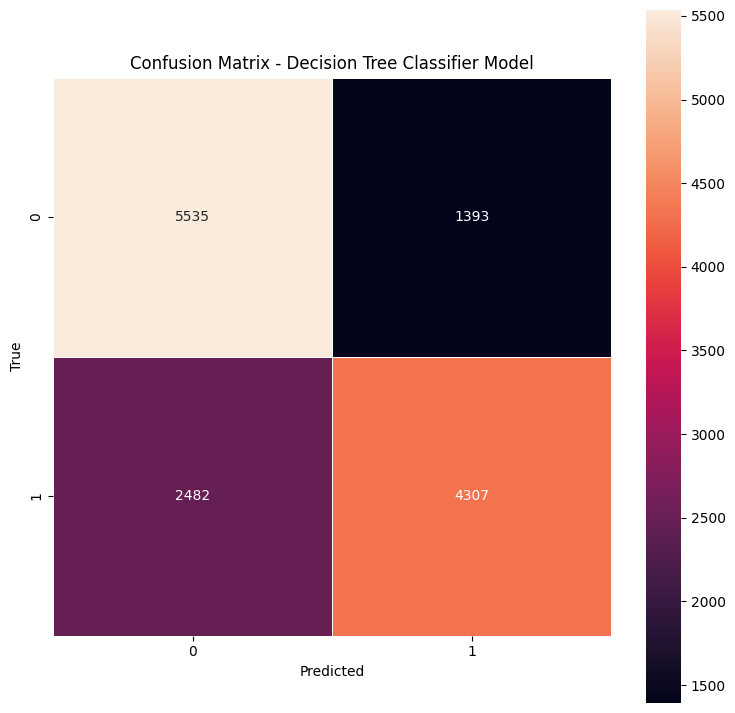

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, fmt='d', linewidths=0.7, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree Classifier Model')
plt.show()

## ROC curve and calculate the AUC score for a Decision Tree classifier

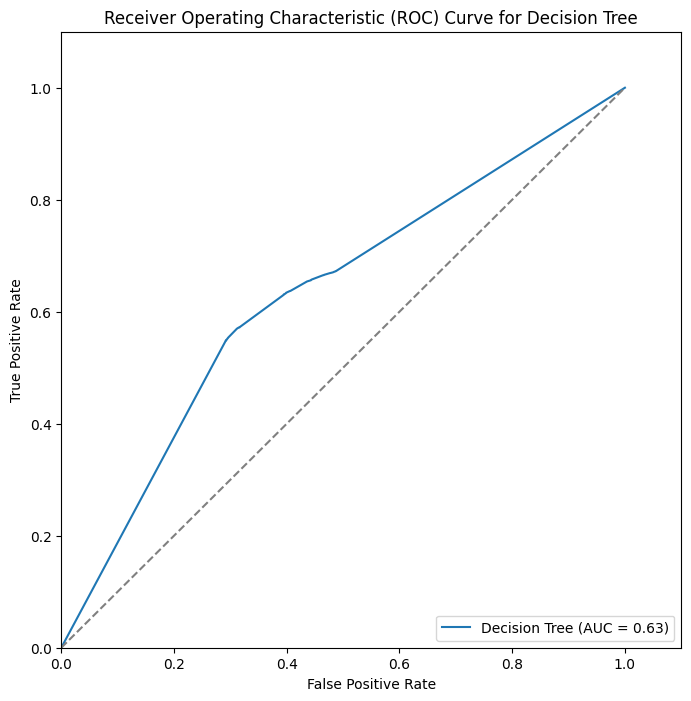

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=20)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Get predicted probabilities for the positive class
dt_probs = decision_tree.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)

# Calculate the AUC score
auc_score_dt = roc_auc_score(y_test, dt_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(auc_score_dt))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()


## Gaussian Naïve Bayes:

In [ ]:
# Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

# Fit the model
gnb_classifier.fit(X_train, y_train)

# Cross-validation scores
gnb_scores = cross_val_score(gnb_classifier, X_train, y_train, cv=6)
print("Gaussian Naive Bayes Classifier Model")
print("CV scores: ", gnb_scores)
print("Mean CV accuracy: {:.2f}".format(gnb_scores.mean()))
print(" ")

# Make predictions on the test data
gnb_pred = gnb_classifier.predict(X_test)

# Model performance
print("Gaussian Naive Bayes Classifier Model")
gnb_accuracy = accuracy_score(y_test, gnb_pred) * 100
print('Accuracy: ', gnb_accuracy)

# Classification report
print(classification_report(y_test, gnb_pred))
print("")


Gaussian Naive Bayes Classifier Model
CV scores:  [0.7129579  0.71940951 0.70978677 0.71795713 0.70920822 0.71598863]
Mean CV accuracy: 0.71
 
Gaussian Naive Bayes Classifier Model
Accuracy:  70.78078297003718
              precision    recall  f1-score   support

         0.0       0.69      0.77      0.73      6928
         1.0       0.73      0.64      0.69      6789

    accuracy                           0.71     13717
   macro avg       0.71      0.71      0.71     13717
weighted avg       0.71      0.71      0.71     13717




- Precision, recall, and F1-score provide insights into the model's performance for each class. In this case, both classes have relatively balanced precision, recall, and F1-score values.

The accuracy of 70.78% suggests that the Gaussian Naive Bayes Classifier model is performing reasonably well. As always, depending on the specific goals of your analysis, you may want to further investigate, potentially by tuning hyperparameters, exploring different features, or considering othe


### Confusion matrix for Gaussian Naive Bayes Classifier

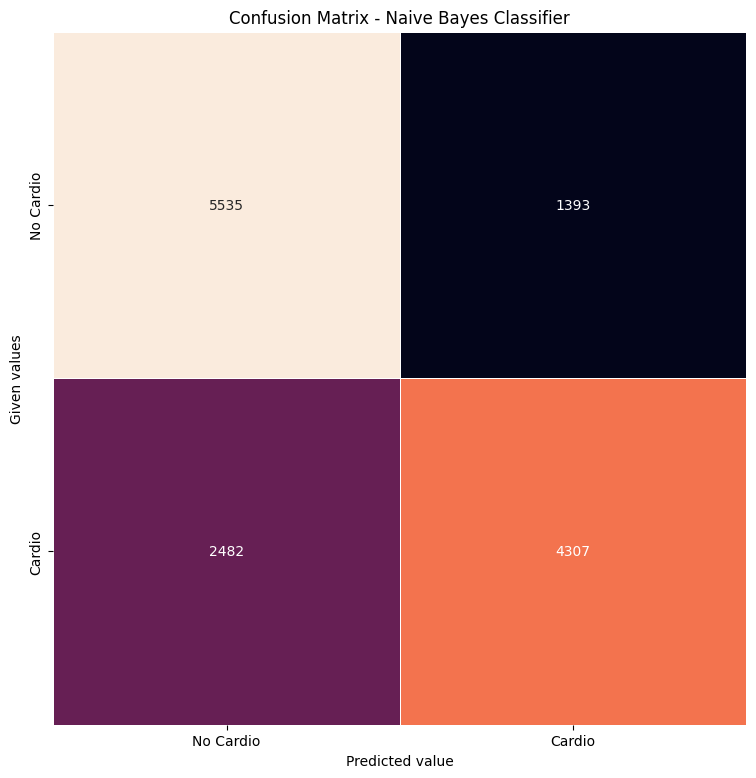

In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", linewidths=.7, square=True, cbar=False,
            xticklabels=['No Cardio', 'Cardio'],
            yticklabels=['No Cardio', 'Cardio'])
plt.xlabel('Predicted value')
plt.ylabel('Given values')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.show()

### ROC and AUC score for Gaussian Naive Bayes Classifier

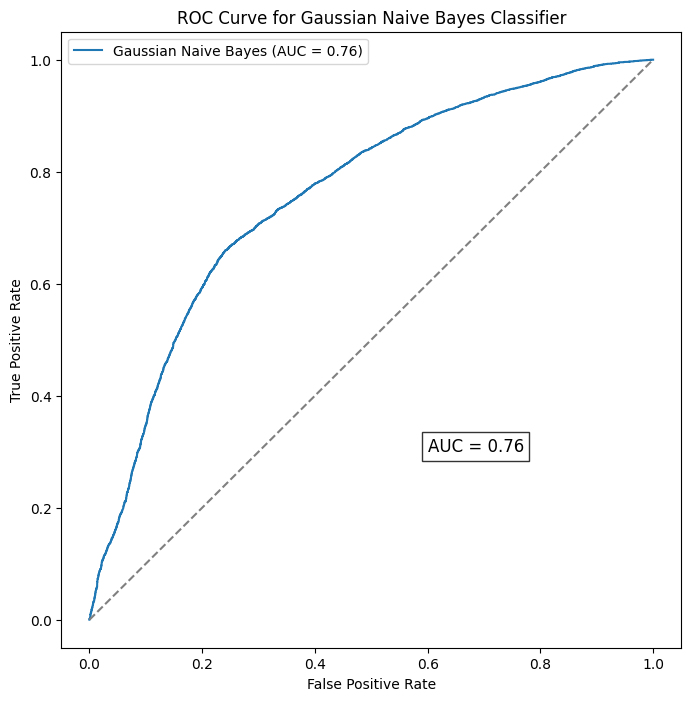

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the model on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Get predicted probabilities for the positive class
nb_probs = naive_bayes_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, nb_probs)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, nb_probs)

# Plot the ROC curve with label and AUC score
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'Gaussian Naive Bayes (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes Classifier')
plt.legend()  # Add legend for clarity

# Display AUC score on the plot
plt.text(0.6, 0.3, f'AUC = {auc_score:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()


### Bar plot representation of Accuracy scores of all 4 Mahcine Learning Models

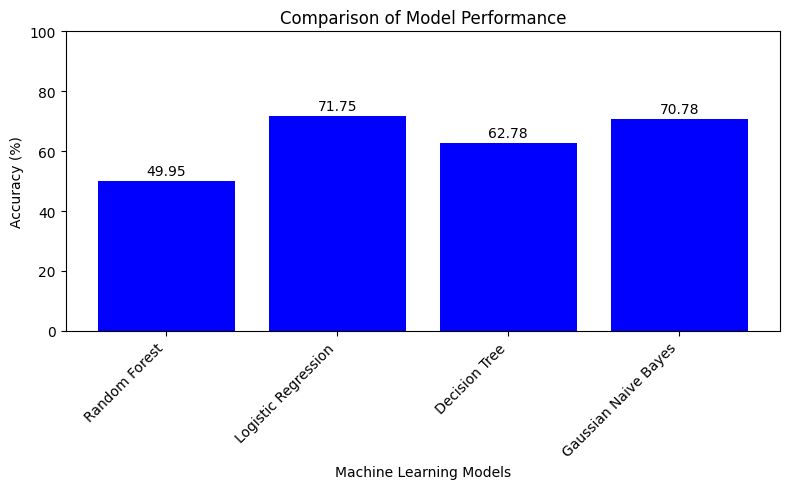

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have accuracy scores for each model
model_names = ['Random Forest','Logistic Regression','Decision Tree', 'Gaussian Naive Bayes', ]
accuracy_scores = [49.95,71.75,62.78,70.78]  # Replace these with your actual accuracy scores

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracy_scores, color='blue')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Performance')
plt.ylim([0, 100])  # Set the y-axis limit to 0-100 for percentage accuracy
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the accuracy values on top of the bars
for i, value in enumerate(accuracy_scores):
    plt.text(i, value + 1, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Calcuate FPR , TPR and AUC & plot ROC curves of ML Model
To calculate the False Positive Rate (FPR), True Positive Rate (TPR), and Area Under the Curve (AUC), as well as plot ROC curves for the four machine learning models (Random Forest,Logistic Regression, Decision Tree, Gaussian Naive Bayes).

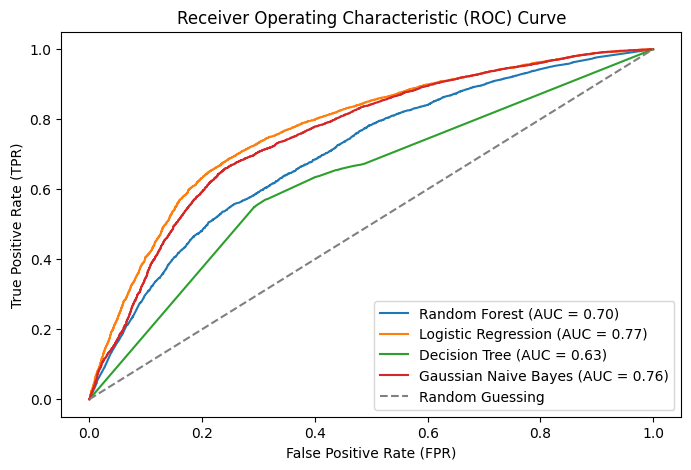

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Define a function to calculate and plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    # Calculate ROC curve
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Calculate AUC
    auc = roc_auc_score(y_test, y_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

# Plot ROC curves for each model
plt.figure(figsize=(8, 5))

# Random Forest
plot_roc_curve(random_forest_model,  X_test, y_test, 'Random Forest')

# Logistic Regression
plot_roc_curve(logreg_model, X_test, y_test, 'Logistic Regression')

# Decision Tree
plot_roc_curve(decision_tree, X_test, y_test, 'Decision Tree')

# Gaussian Naive Bayes
plot_roc_curve(gnb_classifier, X_test, y_test, 'Gaussian Naive Bayes')

# Plot ROC curve for random guessing (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')

# Customize the plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()
